In [63]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import matplotlib.pyplot as plt

W = torch.zeros([4, 1], requires_grad = True) 
b = torch.zeros(1, requires_grad = True)

data = {
    'name': ['Kim', 'Lee', 'Park', 'Choi', 'Jung', 'Go', 'Woo', 'Min', 'Kang'],
    'GPA': [3.8, 3.2, 3.7, 4.2, 2.6, 3.4, 4.1, 3.3, 3.9],
    'TOEIC': [700, 650, 820, 830, 550, 910, 990, 870, 650],
    'Award': [80, 90, 70, 50, 90, 30, 70, 60, 80],
    'Etc': [50, 30, 40, 70, 60, 40, 20, 60, 50]
}

gpa_tensor = torch.FloatTensor(data['GPA'])
toeic_tensor = torch.FloatTensor(data['TOEIC'])
award_tensor = torch.FloatTensor(data['Award'])
etc_tensor = torch.FloatTensor(data['Etc'])

print("GPA Tensor:")
print(gpa_tensor)

print("\nTOEIC Tensor:")
print(toeic_tensor)

print("\nAward Tensor:")
print(award_tensor)

print("\nEtc Tensor:")
print(etc_tensor)

X_train = torch.FloatTensor([
    data['GPA'],
    data['TOEIC'],
    data['Award'],
    data['Etc']
])

y_train = torch.FloatTensor([85, 80, 78, 87, 85, 70, 81, 88, 84]) 

print(X_train.shape, y_train.shape)


GPA Tensor:
tensor([3.8000, 3.2000, 3.7000, 4.2000, 2.6000, 3.4000, 4.1000, 3.3000, 3.9000])

TOEIC Tensor:
tensor([700., 650., 820., 830., 550., 910., 990., 870., 650.])

Award Tensor:
tensor([80., 90., 70., 50., 90., 30., 70., 60., 80.])

Etc Tensor:
tensor([50., 30., 40., 70., 60., 40., 20., 60., 50.])
torch.Size([4, 9]) torch.Size([9])


In [64]:
X_train_t = torch.transpose(X_train, 0, 1)
print (X_train_t.shape)
print (X_train_t)

torch.Size([9, 4])
tensor([[  3.8000, 700.0000,  80.0000,  50.0000],
        [  3.2000, 650.0000,  90.0000,  30.0000],
        [  3.7000, 820.0000,  70.0000,  40.0000],
        [  4.2000, 830.0000,  50.0000,  70.0000],
        [  2.6000, 550.0000,  90.0000,  60.0000],
        [  3.4000, 910.0000,  30.0000,  40.0000],
        [  4.1000, 990.0000,  70.0000,  20.0000],
        [  3.3000, 870.0000,  60.0000,  60.0000],
        [  3.9000, 650.0000,  80.0000,  50.0000]])


In [68]:
lrs = [0.0001, 0.00001, 0.000001, 0.0000001]
num_epochs = [10, 20, 40, 80, 100, 500, 1000]
dir_rsts = {}

for lr in lrs:
    W = torch.zeros([4,1], requires_grad = True) 
    b = torch.zeros(1, requires_grad = True)
    
    optimizer = optim.SGD([W, b], lr=lr)
    dir_rsts[str(lr)] = {}
    
    for ep in num_epochs:
        print(f'< Before Train : {lr} {ep}>')
        print('W = ', W)
        print('b =', b)
        costs = []
        
        for epoch in range(ep):
            hypothesis = torch.matmul(X_train_t, W) + b
            cost = torch.mean((hypothesis - y_train) ** 2)
            
            optimizer.zero_grad()
            cost.backward()
            optimizer.step()
            
            if epoch % 5 == 0:
                print('Epoch: %d , Cost: %f' %(epoch, cost))
            
            costs.append(float(cost))
            
        print(f'< After Train : {lr} {ep}>')
        print('W = ', W)
        print('b =', b)
        print("\n --------------------------- \n")
        
        dir_compo = {
            'W': W.detach().clone(), 
            'b': b.detach().clone(),
            'costs': costs
        }
        dir_rsts[str(lr)][str(ep)] = dir_compo

< Before Train : 0.0001 10>
W =  tensor([[0.],
        [0.],
        [0.],
        [0.]], requires_grad=True)
b = tensor([0.], requires_grad=True)
Epoch: 0 , Cost: 6751.555664
Epoch: 5 , Cost: 5574010575117897061892096.000000
< After Train : 0.0001 10>
W =  tensor([[-3.9418e+17],
        [-8.6826e+19],
        [-7.2472e+18],
        [-4.9883e+18]], requires_grad=True)
b = tensor([-1.0884e+17], requires_grad=True)

 --------------------------- 

< Before Train : 0.0001 20>
W =  tensor([[-3.9418e+17],
        [-8.6826e+19],
        [-7.2472e+18],
        [-4.9883e+18]], requires_grad=True)
b = tensor([-1.0884e+17], requires_grad=True)
Epoch: 0 , Cost: inf
Epoch: 5 , Cost: inf
Epoch: 10 , Cost: nan
Epoch: 15 , Cost: nan
< After Train : 0.0001 20>
W =  tensor([[nan],
        [nan],
        [nan],
        [nan]], requires_grad=True)
b = tensor([nan], requires_grad=True)

 --------------------------- 

< Before Train : 0.0001 40>
W =  tensor([[nan],
        [nan],
        [nan],
        [nan

Epoch: 640 , Cost: nan
Epoch: 645 , Cost: nan
Epoch: 650 , Cost: nan
Epoch: 655 , Cost: nan
Epoch: 660 , Cost: nan
Epoch: 665 , Cost: nan
Epoch: 670 , Cost: nan
Epoch: 675 , Cost: nan
Epoch: 680 , Cost: nan
Epoch: 685 , Cost: nan
Epoch: 690 , Cost: nan
Epoch: 695 , Cost: nan
Epoch: 700 , Cost: nan
Epoch: 705 , Cost: nan
Epoch: 710 , Cost: nan
Epoch: 715 , Cost: nan
Epoch: 720 , Cost: nan
Epoch: 725 , Cost: nan
Epoch: 730 , Cost: nan
Epoch: 735 , Cost: nan
Epoch: 740 , Cost: nan
Epoch: 745 , Cost: nan
Epoch: 750 , Cost: nan
Epoch: 755 , Cost: nan
Epoch: 760 , Cost: nan
Epoch: 765 , Cost: nan
Epoch: 770 , Cost: nan
Epoch: 775 , Cost: nan
Epoch: 780 , Cost: nan
Epoch: 785 , Cost: nan
Epoch: 790 , Cost: nan
Epoch: 795 , Cost: nan
Epoch: 800 , Cost: nan
Epoch: 805 , Cost: nan
Epoch: 810 , Cost: nan
Epoch: 815 , Cost: nan
Epoch: 820 , Cost: nan
Epoch: 825 , Cost: nan
Epoch: 830 , Cost: nan
Epoch: 835 , Cost: nan
Epoch: 840 , Cost: nan
Epoch: 845 , Cost: nan
Epoch: 850 , Cost: nan
Epoch: 855 

Epoch: 140 , Cost: nan
Epoch: 145 , Cost: nan
Epoch: 150 , Cost: nan
Epoch: 155 , Cost: nan
Epoch: 160 , Cost: nan
Epoch: 165 , Cost: nan
Epoch: 170 , Cost: nan
Epoch: 175 , Cost: nan
Epoch: 180 , Cost: nan
Epoch: 185 , Cost: nan
Epoch: 190 , Cost: nan
Epoch: 195 , Cost: nan
Epoch: 200 , Cost: nan
Epoch: 205 , Cost: nan
Epoch: 210 , Cost: nan
Epoch: 215 , Cost: nan
Epoch: 220 , Cost: nan
Epoch: 225 , Cost: nan
Epoch: 230 , Cost: nan
Epoch: 235 , Cost: nan
Epoch: 240 , Cost: nan
Epoch: 245 , Cost: nan
Epoch: 250 , Cost: nan
Epoch: 255 , Cost: nan
Epoch: 260 , Cost: nan
Epoch: 265 , Cost: nan
Epoch: 270 , Cost: nan
Epoch: 275 , Cost: nan
Epoch: 280 , Cost: nan
Epoch: 285 , Cost: nan
Epoch: 290 , Cost: nan
Epoch: 295 , Cost: nan
Epoch: 300 , Cost: nan
Epoch: 305 , Cost: nan
Epoch: 310 , Cost: nan
Epoch: 315 , Cost: nan
Epoch: 320 , Cost: nan
Epoch: 325 , Cost: nan
Epoch: 330 , Cost: nan
Epoch: 335 , Cost: nan
Epoch: 340 , Cost: nan
Epoch: 345 , Cost: nan
Epoch: 350 , Cost: nan
Epoch: 355 

Epoch: 135 , Cost: 91.806252
Epoch: 140 , Cost: 91.024086
Epoch: 145 , Cost: 90.255325
Epoch: 150 , Cost: 89.499977
Epoch: 155 , Cost: 88.757614
Epoch: 160 , Cost: 88.028099
Epoch: 165 , Cost: 87.311188
Epoch: 170 , Cost: 86.606651
Epoch: 175 , Cost: 85.914268
Epoch: 180 , Cost: 85.233841
Epoch: 185 , Cost: 84.565208
Epoch: 190 , Cost: 83.908051
Epoch: 195 , Cost: 83.262291
Epoch: 200 , Cost: 82.627647
Epoch: 205 , Cost: 82.003944
Epoch: 210 , Cost: 81.390999
Epoch: 215 , Cost: 80.788689
Epoch: 220 , Cost: 80.196678
Epoch: 225 , Cost: 79.614937
Epoch: 230 , Cost: 79.043198
Epoch: 235 , Cost: 78.481354
Epoch: 240 , Cost: 77.929176
Epoch: 245 , Cost: 77.386497
Epoch: 250 , Cost: 76.853165
Epoch: 255 , Cost: 76.329071
Epoch: 260 , Cost: 75.813919
Epoch: 265 , Cost: 75.307716
Epoch: 270 , Cost: 74.810196
Epoch: 275 , Cost: 74.321251
Epoch: 280 , Cost: 73.840721
Epoch: 285 , Cost: 73.368507
Epoch: 290 , Cost: 72.904335
Epoch: 295 , Cost: 72.448219
Epoch: 300 , Cost: 71.999931
Epoch: 305 , C

Epoch: 10 , Cost: 217.841263
Epoch: 15 , Cost: 217.431183
Epoch: 20 , Cost: 217.103592
Epoch: 25 , Cost: 216.798157
Epoch: 30 , Cost: 216.498993
Epoch: 35 , Cost: 216.201706
< After Train : 1e-07 40>
W =  tensor([[0.0005],
        [0.1012],
        [0.0133],
        [0.0083]], requires_grad=True)
b = tensor([0.0002], requires_grad=True)

 --------------------------- 

< Before Train : 1e-07 80>
W =  tensor([[0.0005],
        [0.1012],
        [0.0133],
        [0.0083]], requires_grad=True)
b = tensor([0.0002], requires_grad=True)
Epoch: 0 , Cost: 215.905365
Epoch: 5 , Cost: 215.609711
Epoch: 10 , Cost: 215.314545
Epoch: 15 , Cost: 215.019989
Epoch: 20 , Cost: 214.725891
Epoch: 25 , Cost: 214.432251
Epoch: 30 , Cost: 214.139175
Epoch: 35 , Cost: 213.846619
Epoch: 40 , Cost: 213.554611
Epoch: 45 , Cost: 213.262970
Epoch: 50 , Cost: 212.971954
Epoch: 55 , Cost: 212.681427
Epoch: 60 , Cost: 212.391464
Epoch: 65 , Cost: 212.101944
Epoch: 70 , Cost: 211.812958
Epoch: 75 , Cost: 211.524445
<

Epoch: 605 , Cost: 154.670334
Epoch: 610 , Cost: 154.481873
Epoch: 615 , Cost: 154.293686
Epoch: 620 , Cost: 154.105835
Epoch: 625 , Cost: 153.918335
Epoch: 630 , Cost: 153.731186
Epoch: 635 , Cost: 153.544312
Epoch: 640 , Cost: 153.357773
Epoch: 645 , Cost: 153.171570
Epoch: 650 , Cost: 152.985703
Epoch: 655 , Cost: 152.800125
Epoch: 660 , Cost: 152.614914
Epoch: 665 , Cost: 152.429993
Epoch: 670 , Cost: 152.245377
Epoch: 675 , Cost: 152.061157
Epoch: 680 , Cost: 151.877151
Epoch: 685 , Cost: 151.693619
Epoch: 690 , Cost: 151.510254
Epoch: 695 , Cost: 151.327240
Epoch: 700 , Cost: 151.144623
Epoch: 705 , Cost: 150.962280
Epoch: 710 , Cost: 150.780243
Epoch: 715 , Cost: 150.598541
Epoch: 720 , Cost: 150.417236
Epoch: 725 , Cost: 150.236160
Epoch: 730 , Cost: 150.055405
Epoch: 735 , Cost: 149.874969
Epoch: 740 , Cost: 149.694870
Epoch: 745 , Cost: 149.514999
Epoch: 750 , Cost: 149.335571
Epoch: 755 , Cost: 149.156403
Epoch: 760 , Cost: 148.977509
Epoch: 765 , Cost: 148.798965
Epoch: 770

In [73]:
# print (dir_rsts.keys())

# for key in dir_rsts : 
#     # print (dir_rsts[key])
#     print ("------" * 5, key, "------" * 5)
#     token_nan = 0
#     for ep in dir_rsts[key].keys() : 
#         print ("------" * 2, ep, "------" * 2)
#         print ("W : ", dir_rsts[key][ep]['W'])
#         print ("b : ", dir_rsts[key][ep]['b'])
#         test_data = torch.FloatTensor([[3.3, 700, 77, 84]])
#         predict = test_data.matmul(W) + b
#         pred_val = predict.squeeze().detach().numpy()
#         print (pred_val)

print(dir_rsts.keys())
for key in dir_rsts:
    print("------" * 5, key, "------" * 5)
    token_nan = 0
    
    for ep in dir_rsts[key].keys():
        print("------" * 2, ep, "------" * 2)
        W_val = dir_rsts[key][ep]['W']
        b_val = dir_rsts[key][ep]['b']
        print("W : ", W_val)
        print("b : ", b_val)
        
        test_data = torch.FloatTensor([[3.3, 700, 77, 84]])
        predict = test_data.matmul(W_val) + b_val
        pred_val = predict.squeeze().detach().numpy()
        print(pred_val)

dict_keys(['0.0001', '1e-05', '1e-06', '1e-07'])
------------------------------ 0.0001 ------------------------------
------------ 10 ------------
W :  tensor([[-3.9418e+17],
        [-8.6826e+19],
        [-7.2472e+18],
        [-4.9883e+18]])
b :  tensor([-1.0884e+17])
-6.175691e+22
------------ 20 ------------
W :  tensor([[nan],
        [nan],
        [nan],
        [nan]])
b :  tensor([nan])
nan
------------ 40 ------------
W :  tensor([[nan],
        [nan],
        [nan],
        [nan]])
b :  tensor([nan])
nan
------------ 80 ------------
W :  tensor([[nan],
        [nan],
        [nan],
        [nan]])
b :  tensor([nan])
nan
------------ 100 ------------
W :  tensor([[nan],
        [nan],
        [nan],
        [nan]])
b :  tensor([nan])
nan
------------ 500 ------------
W :  tensor([[nan],
        [nan],
        [nan],
        [nan]])
b :  tensor([nan])
nan
------------ 1000 ------------
W :  tensor([[nan],
        [nan],
        [nan],
        [nan]])
b :  tensor([nan])
nan
--

dict_keys(['0.0001', '1e-05', '1e-06', '1e-07'])
------------------------------ 0.0001 ------------------------------


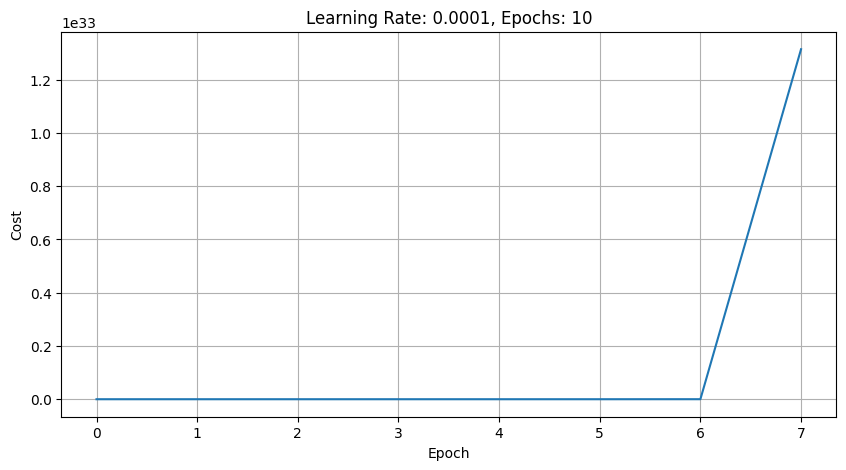

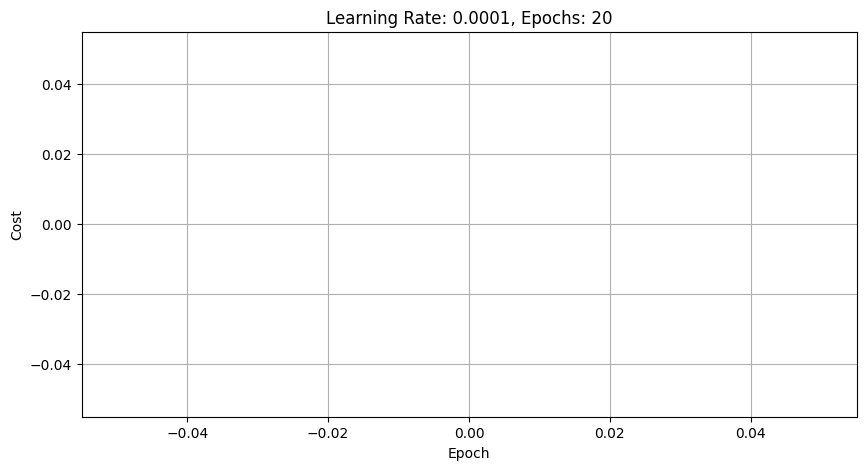

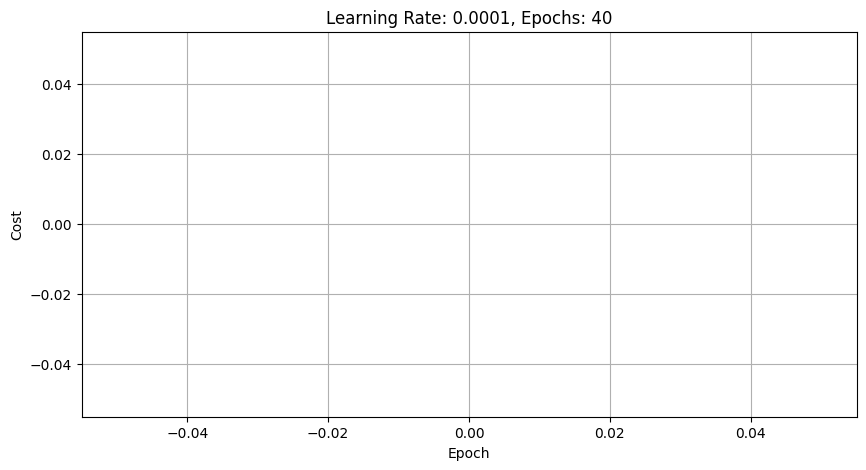

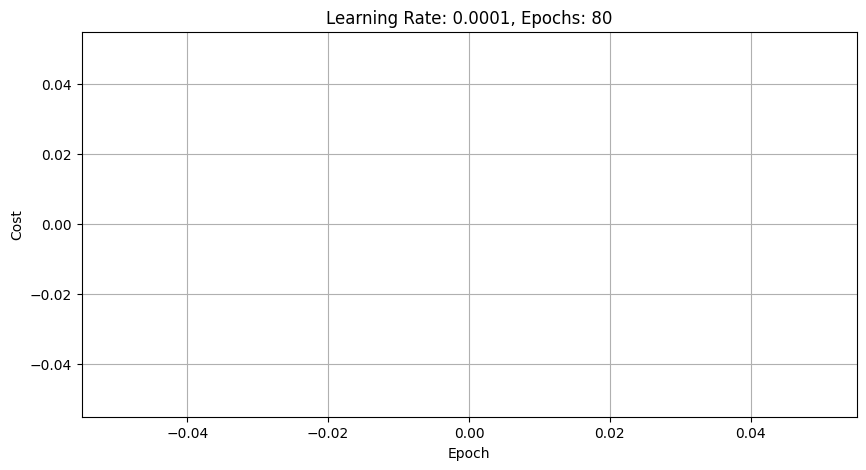

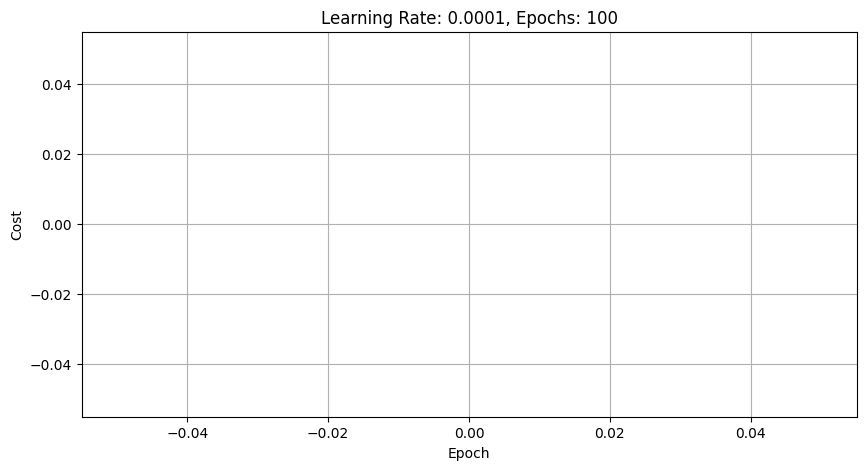

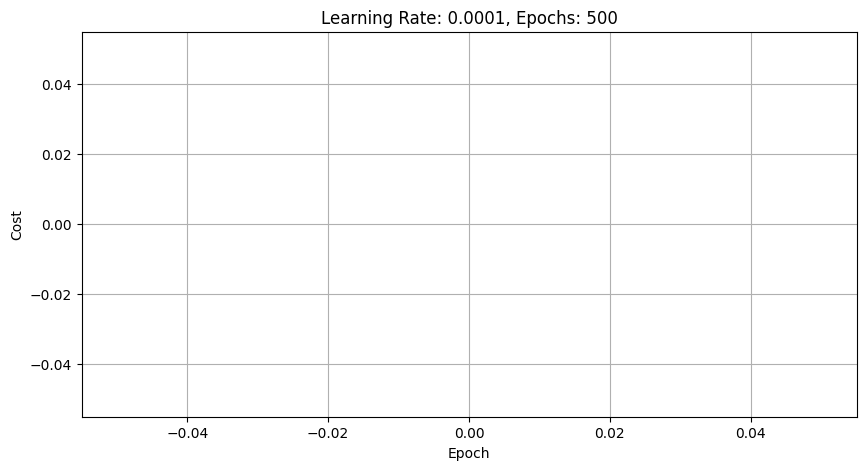

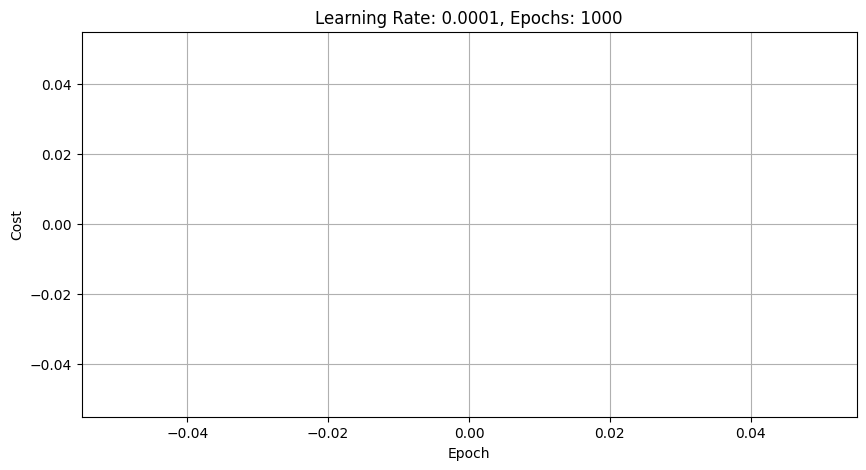

------------------------------ 1e-05 ------------------------------


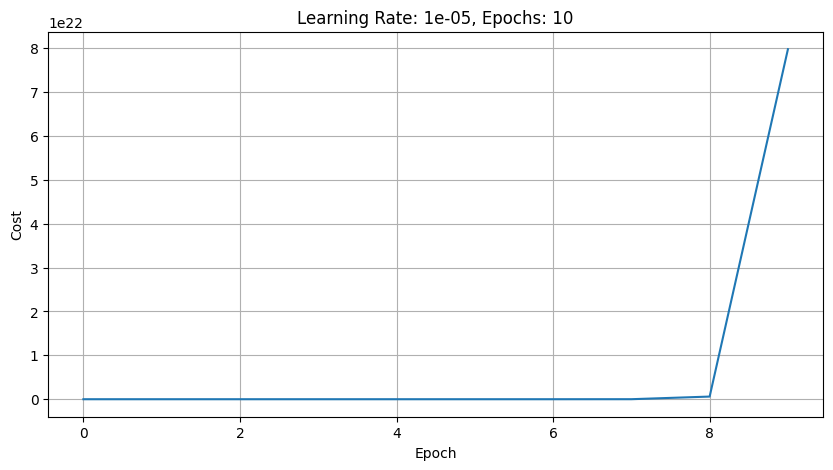

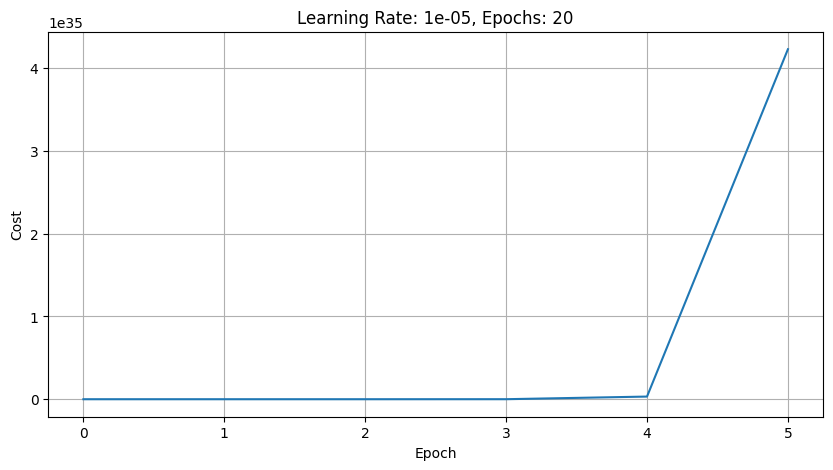

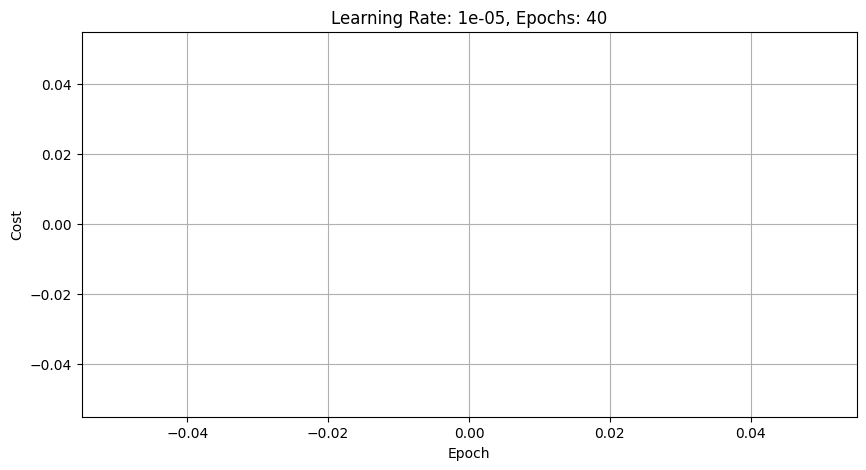

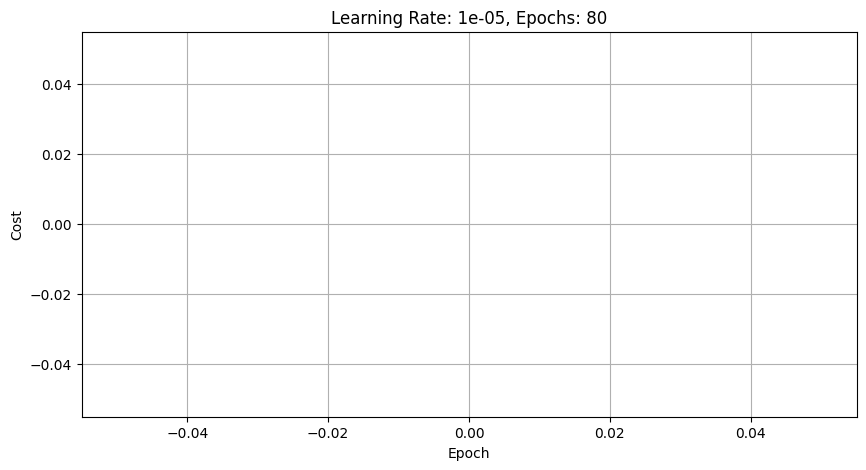

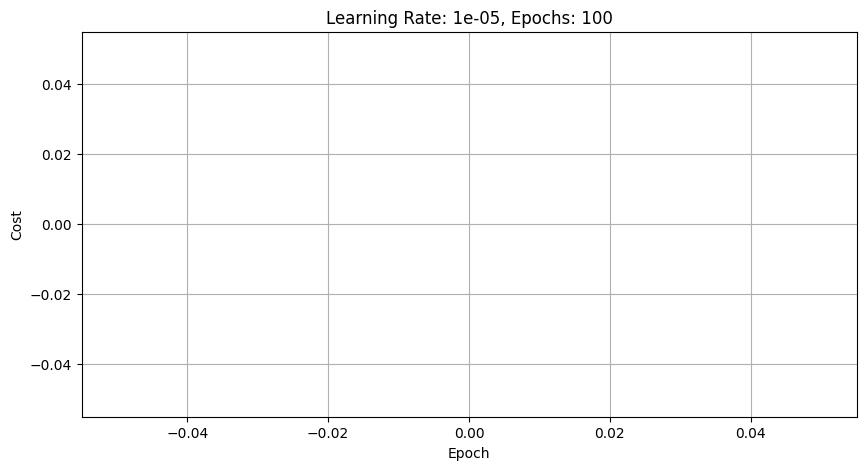

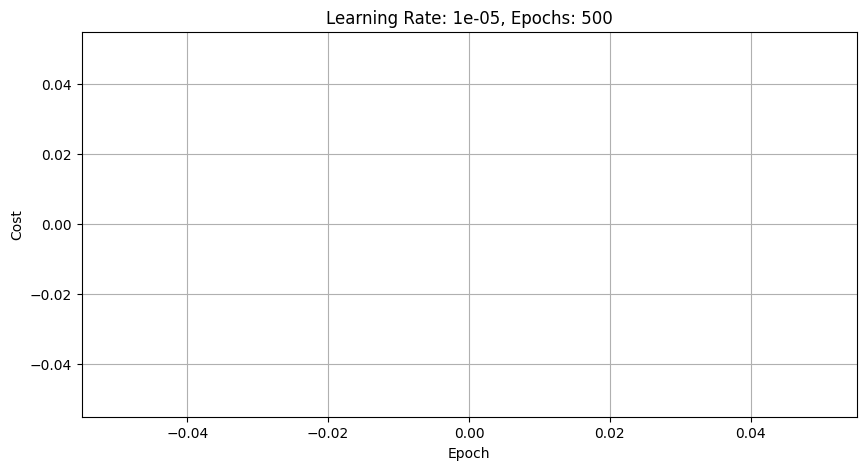

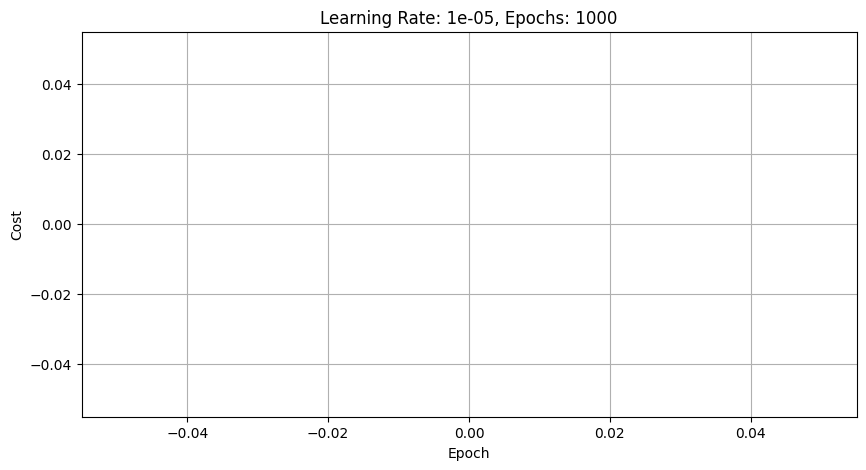

------------------------------ 1e-06 ------------------------------


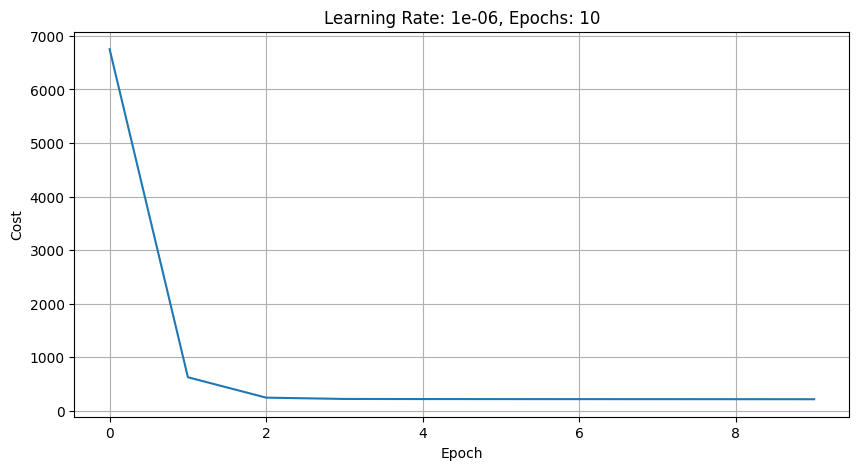

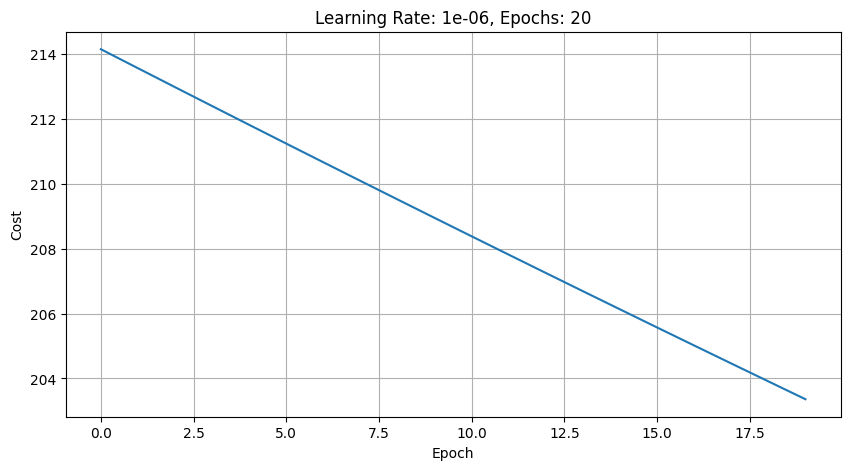

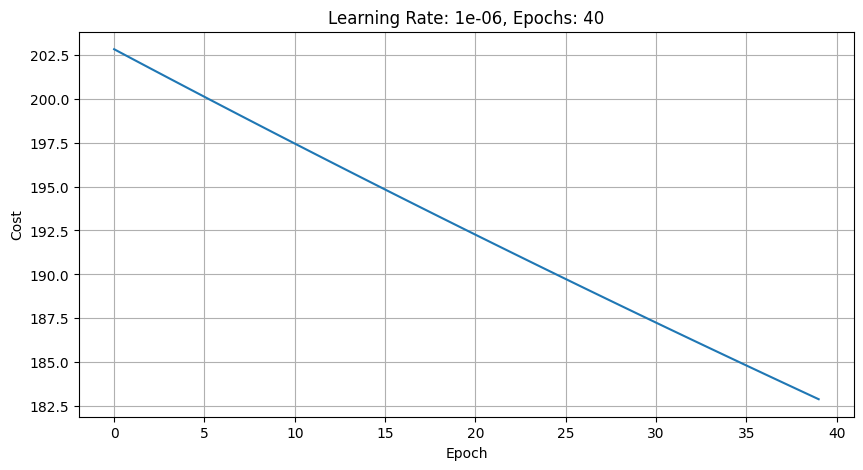

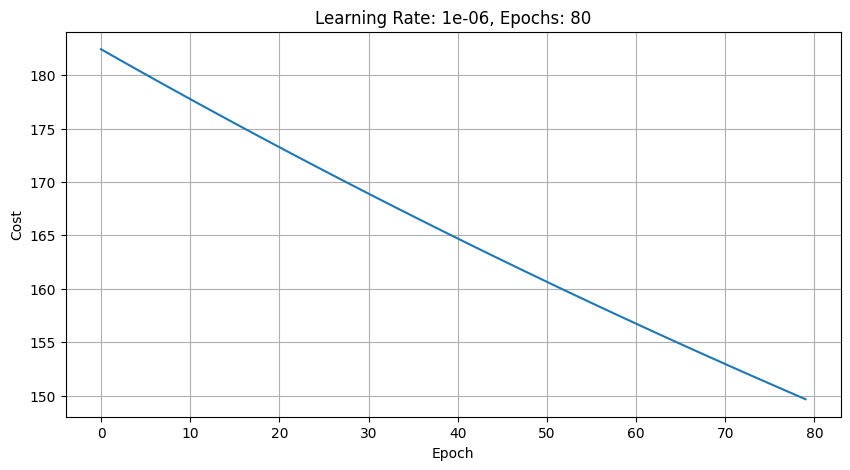

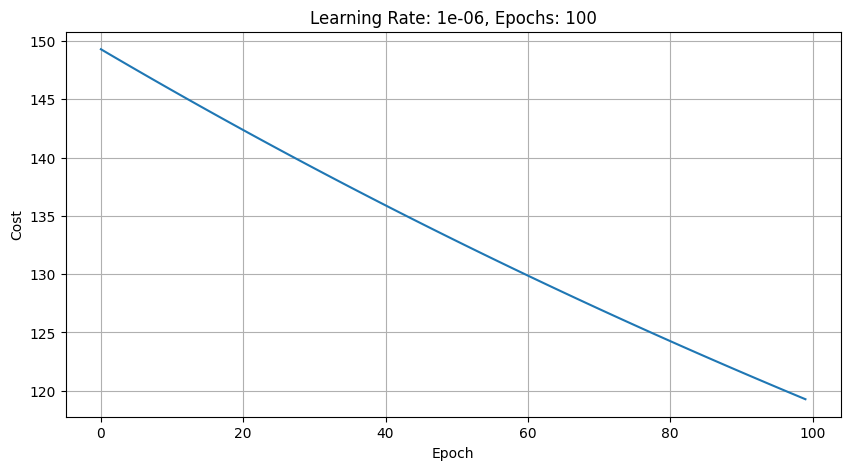

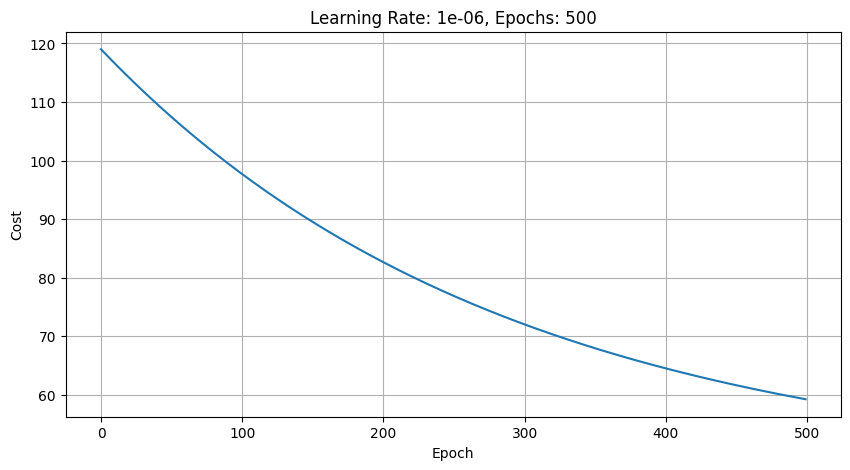

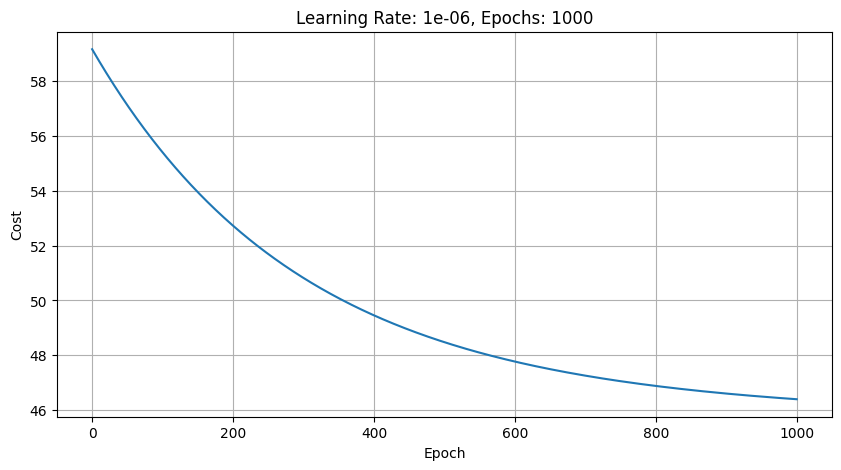

------------------------------ 1e-07 ------------------------------


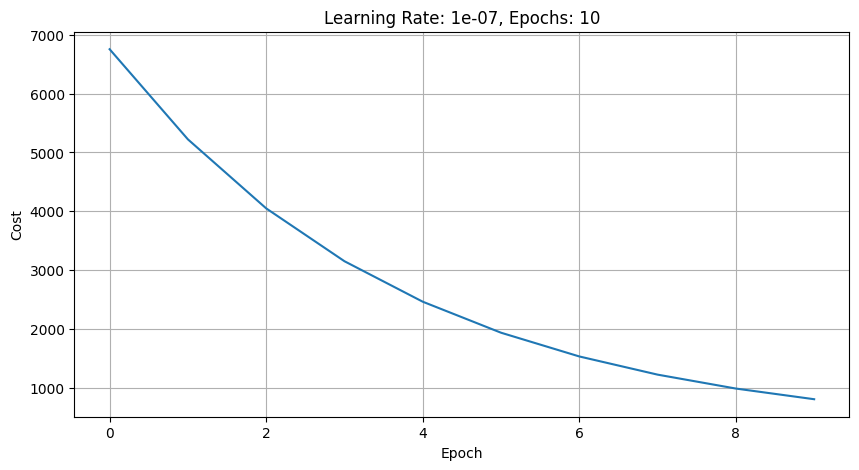

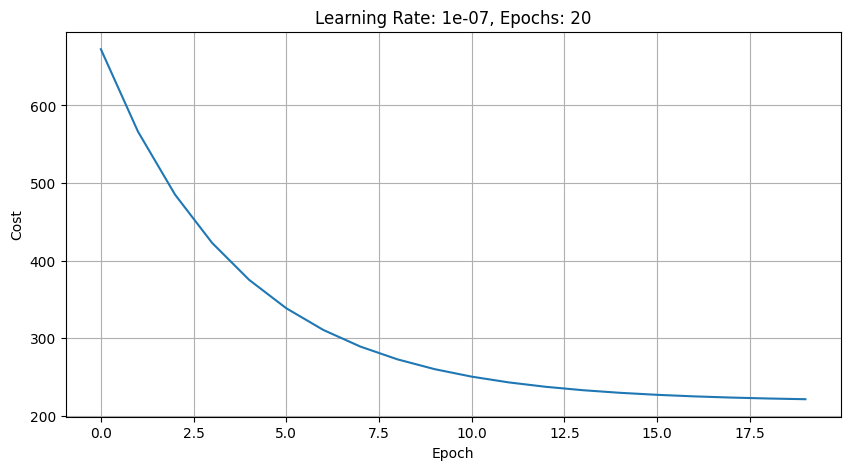

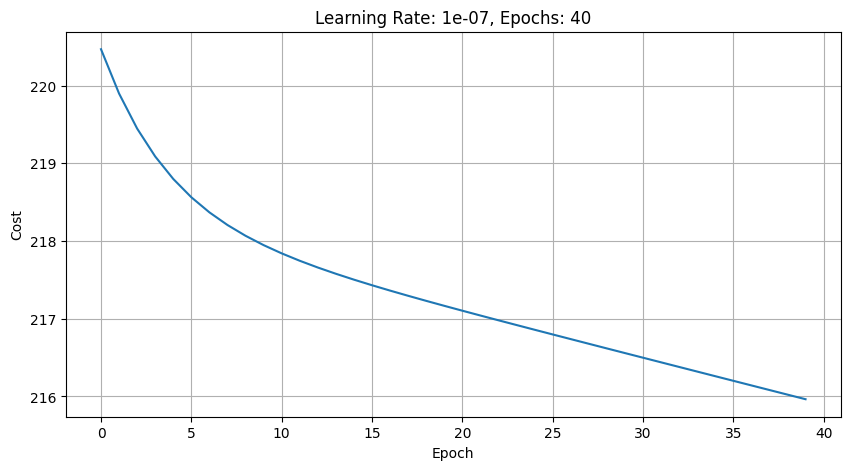

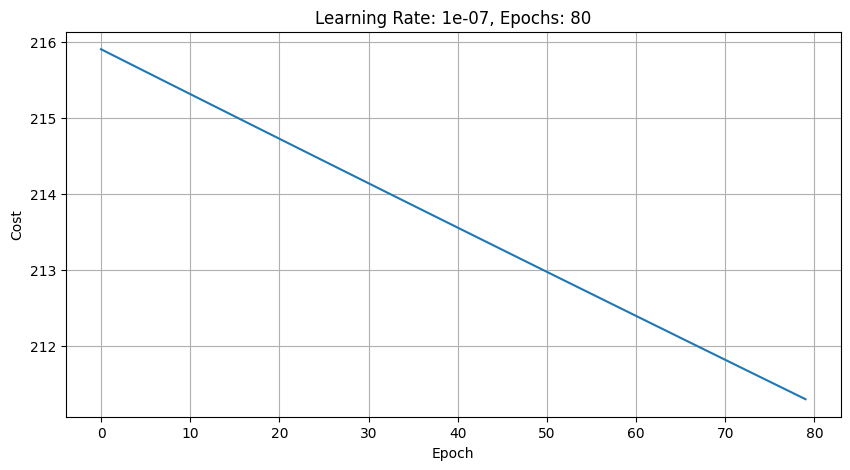

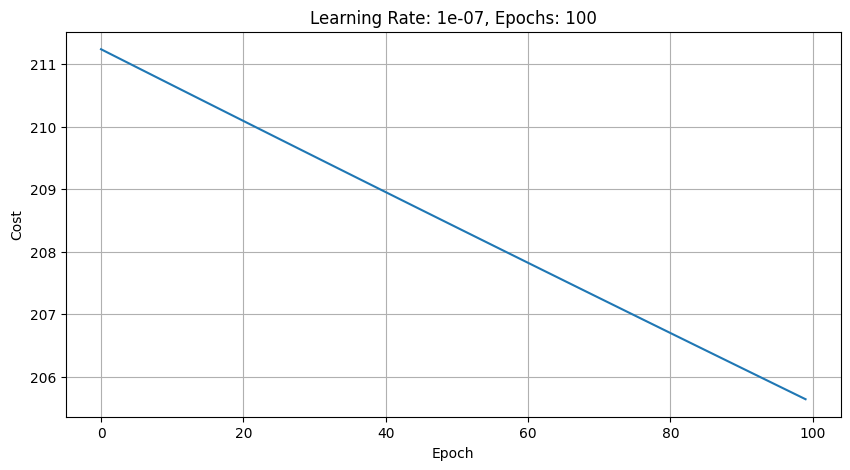

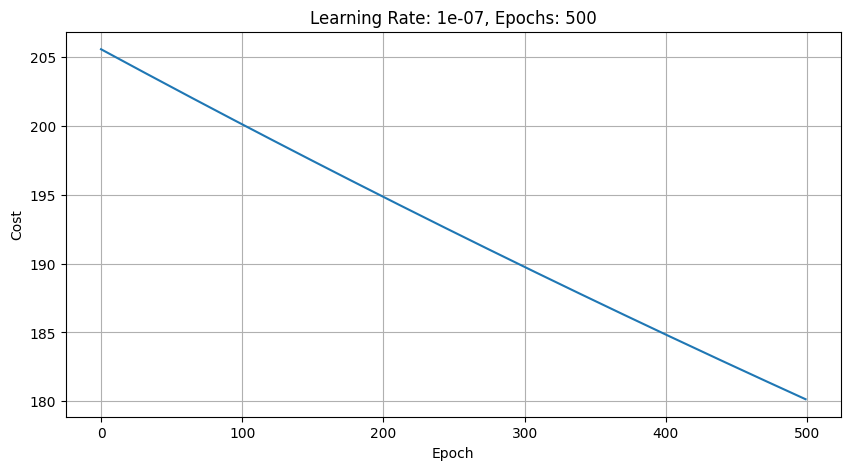

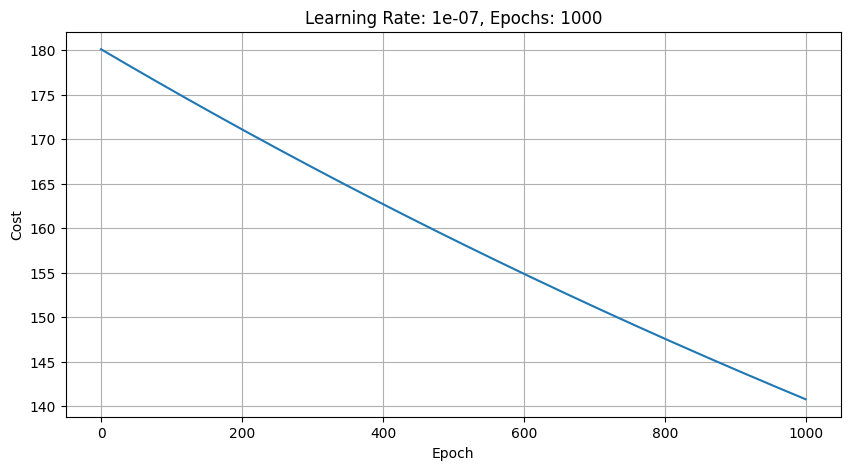

In [72]:
print(dir_rsts.keys())
for key in dir_rsts:
    print("------" * 5, key, "------" * 5)
    
    for ep in dir_rsts[key].keys():
        costs = dir_rsts[key][ep]['costs']
        
        plt.figure(figsize=(10, 5))
        plt.plot(costs)
        plt.title(f'Learning Rate: {key}, Epochs: {ep}')
        plt.xlabel('Epoch')
        plt.ylabel('Cost')
        plt.grid(True)
        plt.show()